In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#------------------Import_libraries------------------
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("./Wine.csv")

In [4]:
#--------------print_sample_of_dataset------------------
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
#---------------Check_dataset_information--------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
#---------------Check_distribution_of_dataset----------------------
df.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#-----------------Check_null_values_in_dataset--------------------
df.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

<Axes: xlabel='1', ylabel='count'>

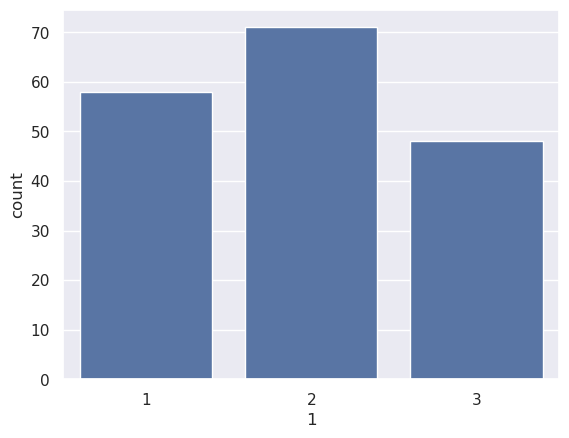

In [8]:
#-------------Check_imbalance_in_dataset--------------------
sns.countplot(x = '1',data=df)

In [9]:
target = df['1']
df = df.drop('1',axis=1)

In [10]:
#-----------Split_dataset_into_train_test_set--------------
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size =0.20,random_state=42)

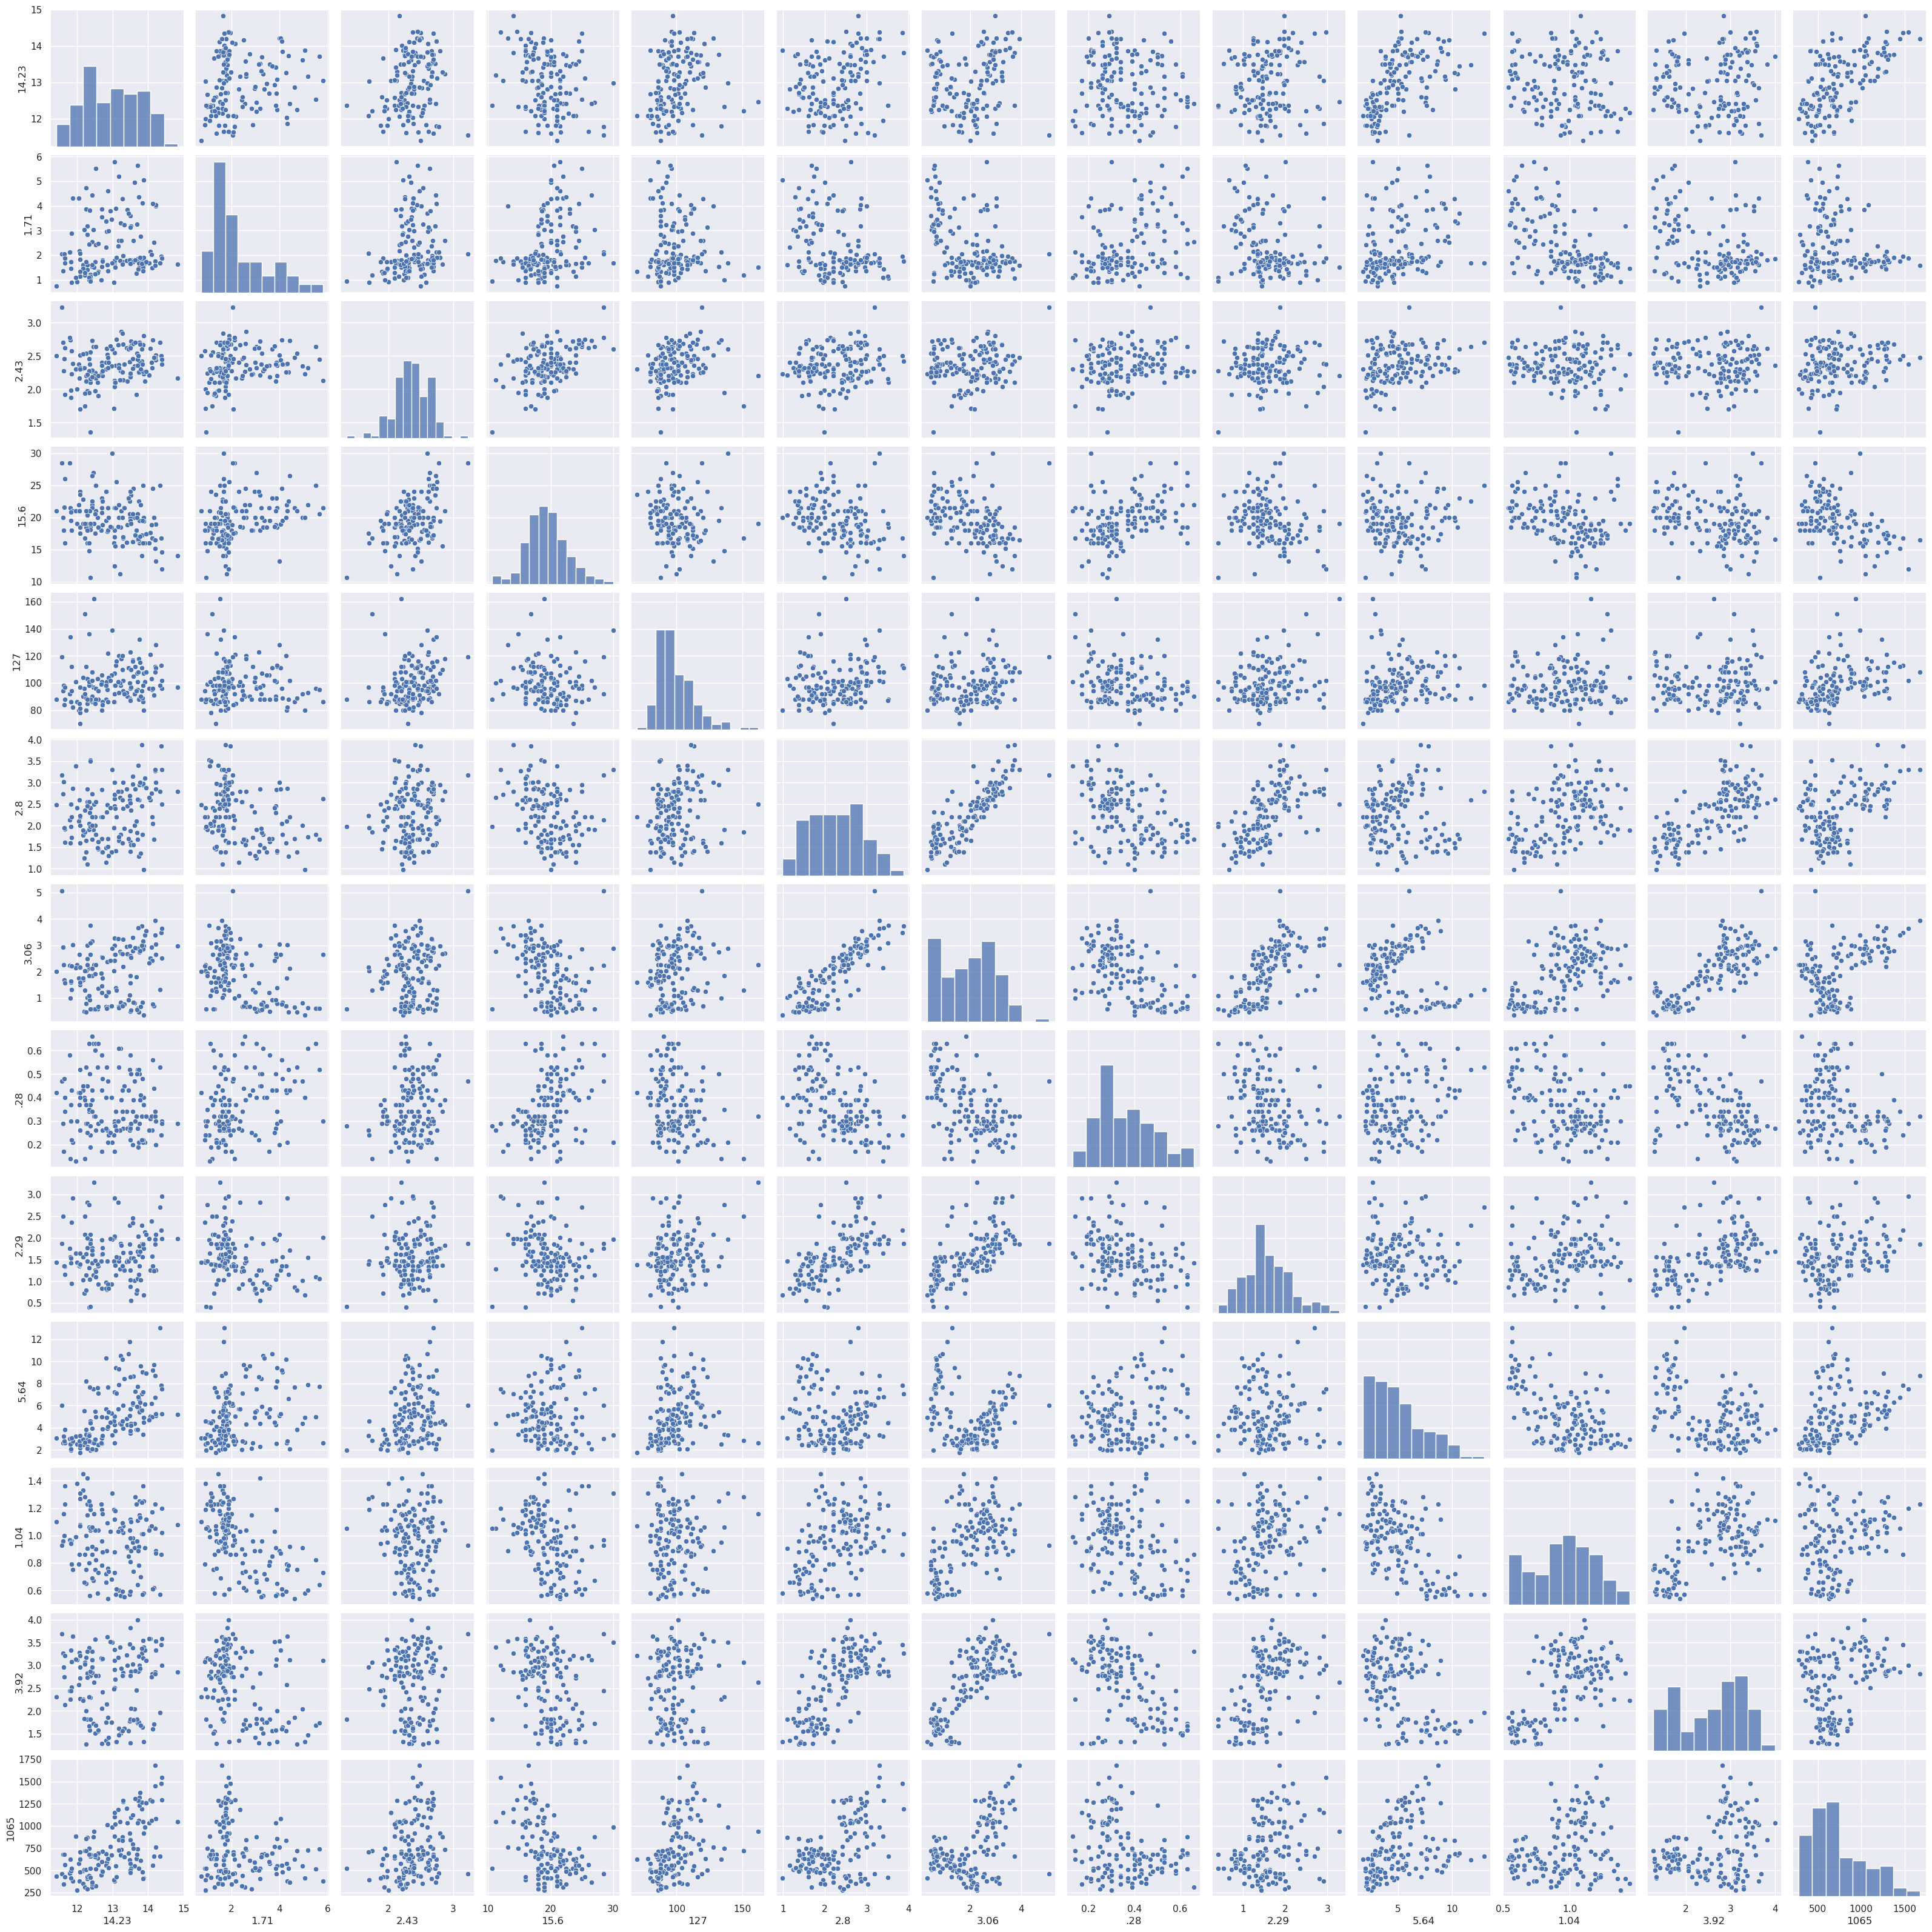

In [11]:
sns.pairplot(X_train)

In [12]:
#------------Implement_scaling-----------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

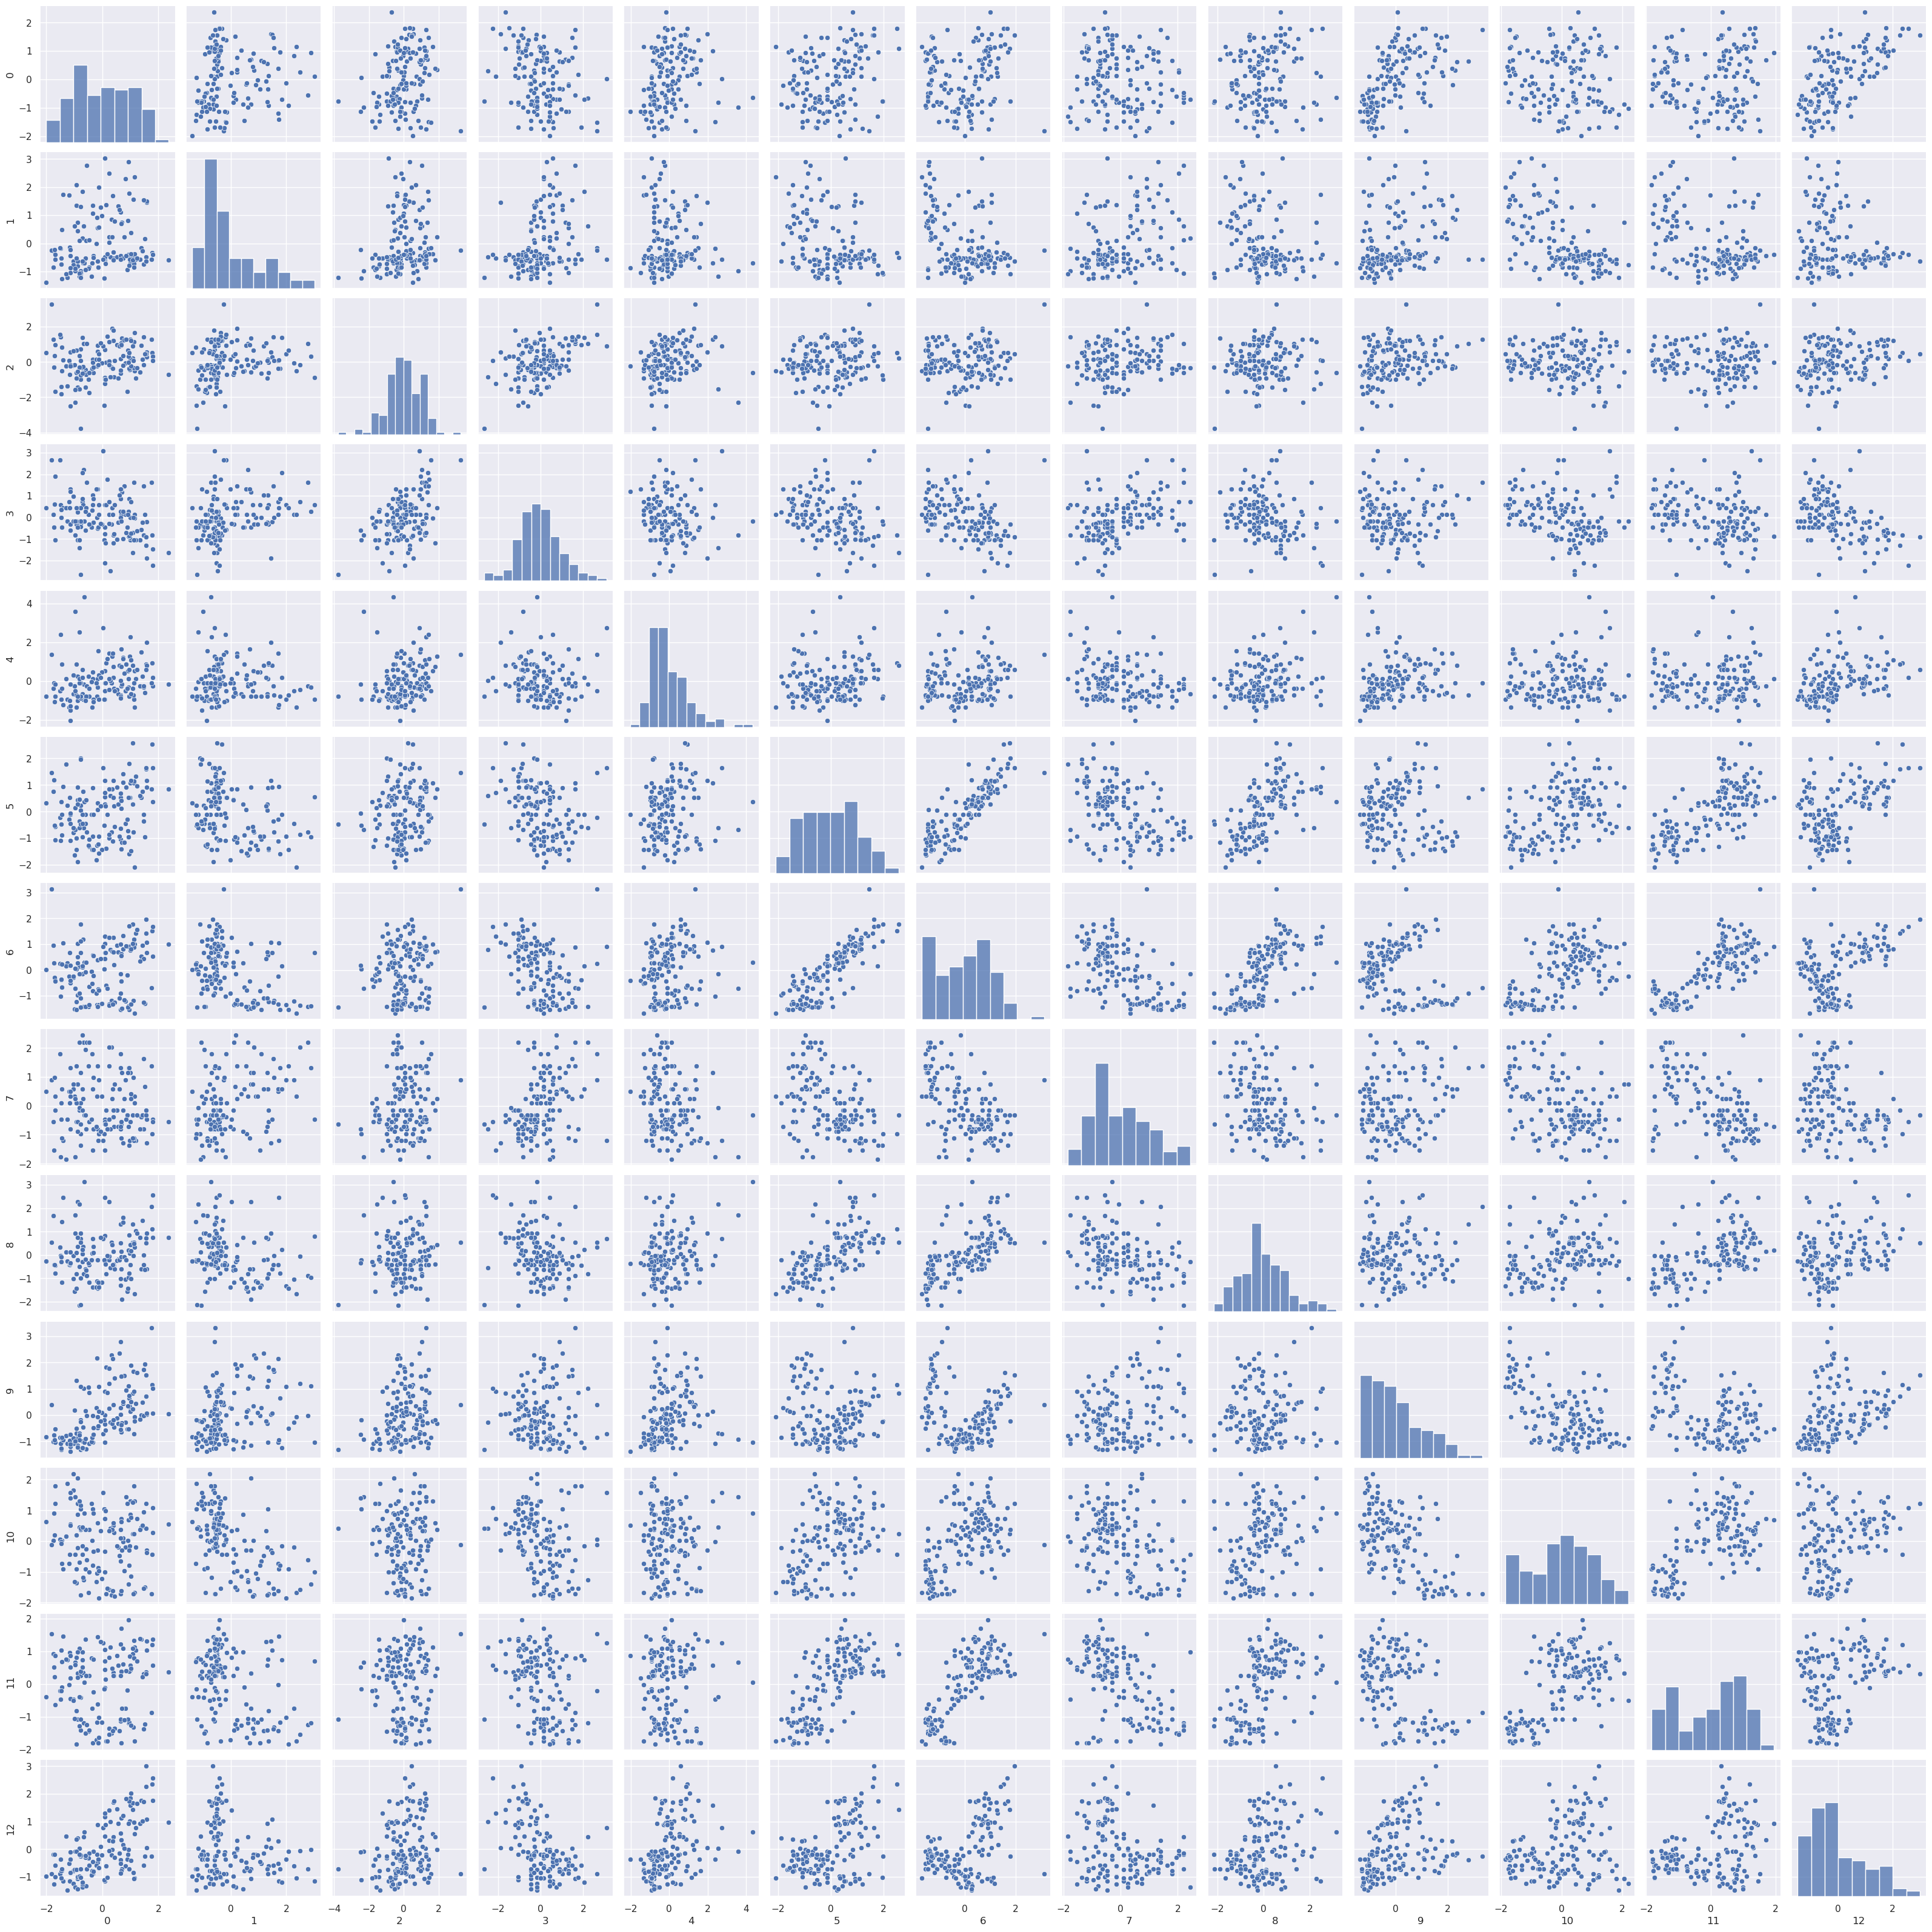

In [14]:
sns.pairplot(X_train)

In [15]:
#-----------------Build_classifier_model_using_all_available_variables------
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()
model.fit(X_train,y_train)
model

LogisticRegression()

In [16]:
#--------Check_model_performance-------------------
from sklearn.metrics import classification_report
print("The classification_report is:{}".format(classification_report(y_test,model.predict(X_test))))

The classification_report is:              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.71      0.83        14
           3       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.93      0.89      0.89        36



<Axes: >

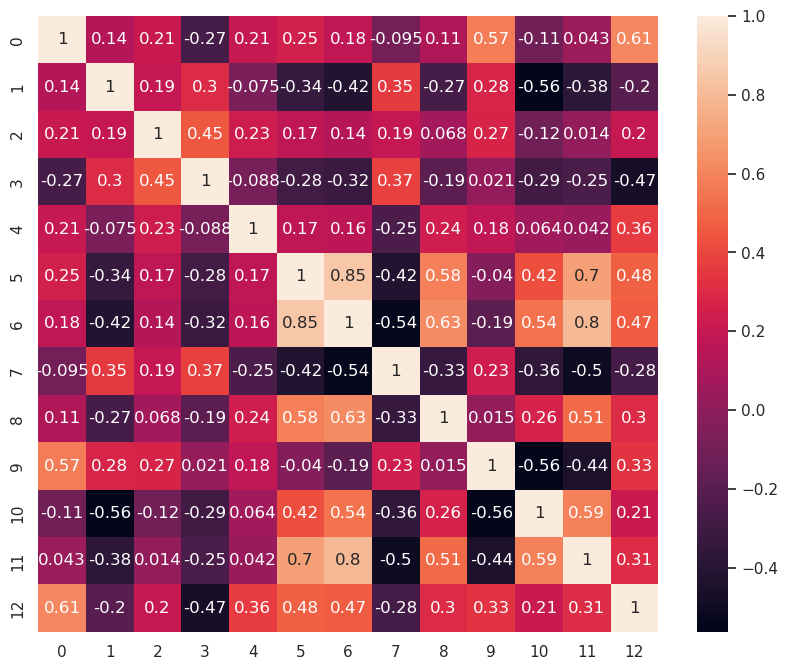

In [17]:
#-----------------Check_correlation_between_independent_variables---------------
plt.figure(figsize =(10,8))
sns.heatmap(X_train.corr(),annot=True)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
tr_comp = pca.fit_transform(X_train)
ts_comp = pca.transform(X_test)

In [19]:
#--------------Plot_PCA-----------------------
sns.scatterplot(tr_comp[:,0],tr_comp[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

Compoents Looks orthogonal to each other

In [ ]:
#---------------Build_ml_model_on_extracted_components---------------
from sklearn.linear_model import LogisticRegression
pc_model = LogisticRegression()
pc_model.fit(tr_comp,y_train)
pc_model

In [ ]:
#------------Evaluate_model_performance---------------
from sklearn.metrics import classification_report
print("The classification report is: {}".format(classification_report(y_test,pc_model.predict(ts_comp))))

**The performance of logistic regression model is improved after performing principal component analysis. PCA not only removed some redundancy 
but also improved variance in the dataset.**